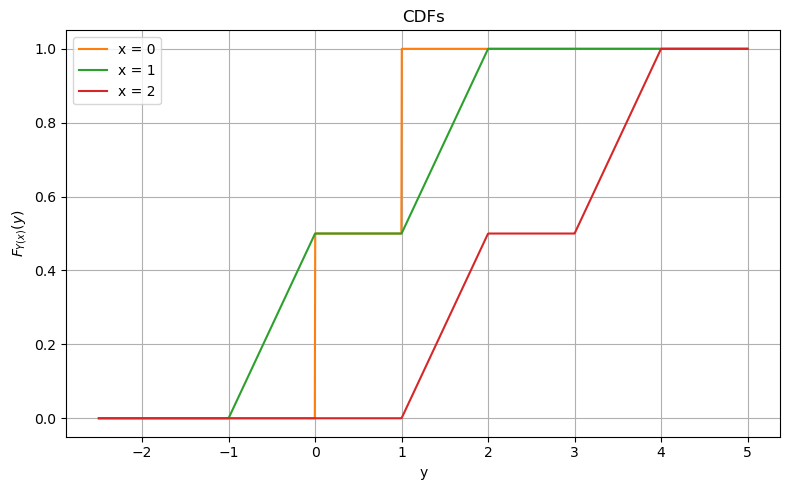

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def cdf_Y(x, y):
    """
    Compute F_{Y(x)}(y) = P(Y(x) <= y) for x in {0,1,2} and y array,
    when U ~ Uniform[-1,1] and
      Y(x) = u*1{x>0} + 1{u>=0} + x*1{x=2}.
    """
    # initialize
    cdf = np.zeros_like(y, dtype=float)

    if x == 0:
        # Y(0) = 1_{u >= 0}.  P(U >= 0) = 1/2.
        # So P(Y(0) = 0) = 1/2, P(Y(0) = 1) = 1/2.
        # CDF jumps:  F(0^-) = 0, F(0) = 0.5, F(1) = 1.
        cdf = np.where(y < 0, 0.0,
               np.where(y <  1, 0.5, 1.0))
        return cdf

    # For x = 1: Y(1) = u + 1_{u>=0}
    #  - If u < 0: Y = u  in [-1, 0)
    #  - If u >= 0: Y = u+1 in [1, 2]
    # So the CDF of Y(1) is:
    #   F(y)=0                                if y < -1
    #   F(y) = P(U <= y) = (y + 1)/2           for -1 <= y < 0
    #   F(y) = 1/2                            for  0 <= y < 1
    #   F(y) = 1/2 + P(u+1 <= y, u>=0) = 1/2 + (y-1)/2  for 1 <= y < 2
    #   F(y) = 1                              for y >= 2
    y1 = y  # shorthand
    cdf1 = np.zeros_like(y1)
    mask1 = (y1 < -1)
    mask2 = (y1 >= -1) & (y1 <  0)
    mask3 = (y1 >=  0) & (y1 <  1)
    mask4 = (y1 >=  1) & (y1 <  2)
    mask5 = (y1 >=  2)

    cdf1[mask1] = 0.0
    cdf1[mask2] = (y1[mask2] + 1)/2
    cdf1[mask3] = 0.5
    cdf1[mask4] = 0.5 + (y1[mask4] - 1)/2
    cdf1[mask5] = 1.0

    if x == 1:
        return cdf1

    # For x = 2: Y(2) = [u + 1_{u>=0}] + 2 = Y(1) + 2.
    # Hence  F_{Y(2)}(y) = F_{Y(1)}(y - 2).
    return cdf_Y(1, y-2)

# Make a fine grid of y-values:
y_vals = np.linspace(-2.5, 5.0, 1500)

cdf0 = cdf_Y(0, y_vals)
cdf1 = cdf_Y(1, y_vals)
cdf2 = cdf_Y(2, y_vals)

plt.figure(figsize=(8,5))
plt.plot(y_vals, cdf0, label='x = 0', color='tab:orange')
plt.plot(y_vals, cdf1, label='x = 1', color='tab:green')
plt.plot(y_vals, cdf2, label='x = 2', color='tab:red')
plt.xlabel('y')
plt.ylabel(r'$F_{Y(x)}(y)$')
plt.title(r'CDFs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()